<a href="https://colab.research.google.com/github/kwnnag/HOMEWORK-GKIKA/blob/main/%CE%91%CE%BD%CF%84%CE%AF%CE%B3%CF%81%CE%B1%CF%86%CE%BF_%CF%84%CE%B5%CE%BB%CE%B9%CE%BA%CE%AE_%CE%B5%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_2024_%CE%9F%CE%BB%CF%85%CE%BC%CF%80%CE%B9%CE%B1%CE%BA%CF%8C%CF%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #!python -m spacy download el_core_news_sm

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Olympiakos report.xlsx")

In [ ]:
df.dropna(inplace=True)
df.reset_index(inplace=True)
df=df.drop_duplicates(subset=["title"])

In [ ]:
df.head()

,index,type,source,title,text,categories,sentiment,date,time,link
0,0,web,updatetimes.gr,Μιλουτίνοφ: «Όταν είσαι στο Final-4 δεν είναι ...,"Μετά το τέλος της αναμέτρησης με το Περιστέρι,...",EUROLEAGUE ΟΛΥΜΠΙΑΚΟΣ,Positive,2024-06-01,23:59:00,https://www.updatetimes.gr/miloutinof-otan-eis...
2,2,web,tempo24.news,Μιλουτίνοφ: «Συγχαρητήρια στον Παναθηναϊκό για...,Ο Νίκολα Μιλουτίνοφ μίλησε για την παρουσία το...,EUROLEAGUE ΟΛΥΜΠΙΑΚΟΣ,Positive,2024-06-01,23:43:00,https://tempo24.news/eidisi/483626/miloytinof-...
3,3,web,makeleio.gr,ΠΟΙΟΣ ΕΛ ΚΑΑΜΠΙ!!! Το… σήκωσε ο Κούλης – Ποδοσ...,"Ο Παναθηναϊκός AKTOR πήρε την Euroleague, ο Ολ...",EUROLEAGUE ΟΛΥΜΠΙΑΚΟΣ,Positive,2024-06-01,23:05:37,https://www.makeleio.gr/%ce%b5%cf%80%ce%b9%ce%...
4,4,web,radiovera.gr,Μιλουτίνοφ: «Συγχαρητήρια στον Παναθηναϊκό για...,Ο Νίκολα Μιλουτίνοφ έβγαλε το… καπέλο στον Παν...,EUROLEAGUE ΟΛΥΜΠΙΑΚΟΣ,Positive,2024-06-01,22:56:28,https://www.radiovera.gr/2024/06/01/miloutinof...
5,5,web,ieidiseis.gr,Αποθέωσε Παναθηναϊκό ο Μιλουτίνοφ - «Συγχαρητή...,Ο\nΝίκολα Μιλουτίνοφ\nμίλησε και για την παρου...,EUROLEAGUE ΟΛΥΜΠΙΑΚΟΣ,Positive,2024-06-01,22:12:29,https://www.ieidiseis.gr/athlitismos/249180/ap...


In [ ]:
df.tail()

,index,type,source,title,text,categories,sentiment,date,time,link
4968,4995,web,bnsports.gr,Ο Γουόκαπ των αντιδράσεων: Ο Λεσόρ ήθελε κορυφ...,Οι πρωταγωνιστές άλλαξαν. Σχεδόν όλοι. Ο\nΤόμα...,EUROLEAGUE ΟΛΥΜΠΙΑΚΟΣ,Positive,2024-05-11,20:03:20,https://www.bnsports.gr/basketball/articles/66...
4969,4996,web,sportlive.gr,"Ρεάλ Μαδρίτης: Χωρίς Ντεκ με Ολυμπιακό, χάνει ...","Πλήγμα στη\nΡεάλ Μαδρίτης\n, καθώς ο\nΓκάμπριε...",EUROLEAGUE ΟΛΥΜΠΙΑΚΟΣ,Positive,2024-05-11,19:59:38,https://sportlive.gr/basket/euroleague/real-ma...
4970,4997,web,gazzetta.gr,Ολυμπιακός: Στον τελικό του Πανελλήνιου Πρωταθ...,Newsroom\nΟι Έφηβοι του Ολυμπιακού εξασφάλισαν...,EUROLEAGUE ΟΛΥΜΠΙΑΚΟΣ,Neutral,2024-05-11,19:28:25,https://www.gazzetta.gr/basketball/2332934/oly...
4971,4998,web,sportdog.gr,Παγίδα για τους φιλάθλους τα εισιτήρια του Fin...,Τι πρέπει να προσέξετε αν ψάχνετε εισιτήρια γι...,EUROLEAGUE ΟΛΥΜΠΙΑΚΟΣ,Neutral,2024-05-11,19:10:26,https://www.sportdog.gr/mpasket/euroleague/827...
4972,4999,web,novasports.gr,Eισιτήρια F4: «Μονόδρομος» για την εξέρευση θέ...,Γιώργος Βαλαβάνης\nΜΠΑΣΚΕΤ\nEuroleague\nΓιώργο...,EUROLEAGUE ΟΛΥΜΠΙΑΚΟΣ,Neutral,2024-05-11,19:07:47,https://www.novasports.gr/sport/mpasket/event/...


In [ ]:
df.describe()

,index
count,3835.000000
mean,2472.434420
std,1453.262522
min,0.000000
25%,1216.500000
50%,2428.000000
75%,3713.500000
max,4999.000000


In [ ]:
df["text"] = df["title"] + " " + df["text"]

In [ ]:
df["datetime"] = df["date"] + " " + df["time"]
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
df["year"] = pd.DatetimeIndex(df["datetime"]).year

df["month"]= pd.DatetimeIndex(df["datetime"]).month

df["day"]= pd.DatetimeIndex(df["datetime"]).day

df["hour"]= pd.DatetimeIndex(df["datetime"]).hour

In [ ]:
hourly_counts = df.groupby('hour').size().reset_index(name='count')

In [ ]:
hourly_counts

,hour,count
0,0,169
1,1,62
2,2,32
3,3,26
4,4,20
5,5,9
6,6,24
7,7,62
8,8,121
9,9,184


In [ ]:
df.columns


Index(['index', 'type', 'source', 'title', 'text', 'categories', 'sentiment',
       'date', 'time', 'link', 'datetime', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [ ]:
df

,index,type,source,title,text,categories,sentiment,date,time,link,datetime,year,month,day,hour
0,0,web,updatetimes.gr,Μιλουτίνοφ: «Όταν είσαι στο Final-4 δεν είναι ...,Μιλουτίνοφ: «Όταν είσαι στο Final-4 δεν είναι ...,EUROLEAGUE ΟΛΥΜΠΙΑΚΟΣ,Positive,2024-06-01,23:59:00,https://www.updatetimes.gr/miloutinof-otan-eis...,2024-06-01 23:59:00,2024,6,1,23
2,2,web,tempo24.news,Μιλουτίνοφ: «Συγχαρητήρια στον Παναθηναϊκό για...,Μιλουτίνοφ: «Συγχαρητήρια στον Παναθηναϊκό για...,EUROLEAGUE ΟΛΥΜΠΙΑΚΟΣ,Positive,2024-06-01,23:43:00,https://tempo24.news/eidisi/483626/miloytinof-...,2024-06-01 23:43:00,2024,6,1,23
3,3,web,makeleio.gr,ΠΟΙΟΣ ΕΛ ΚΑΑΜΠΙ!!! Το… σήκωσε ο Κούλης – Ποδοσ...,ΠΟΙΟΣ ΕΛ ΚΑΑΜΠΙ!!! Το… σήκωσε ο Κούλης – Ποδοσ...,EUROLEAGUE ΟΛΥΜΠΙΑΚΟΣ,Positive,2024-06-01,23:05:37,https://www.makeleio.gr/%ce%b5%cf%80%ce%b9%ce%...,2024-06-01 23:05:37,2024,6,1,23
4,4,web,radiovera.gr,Μιλουτίνοφ: «Συγχαρητήρια στον Παναθηναϊκό για...,Μιλουτίνοφ: «Συγχαρητήρια στον Παναθηναϊκό για...,EUROLEAGUE ΟΛΥΜΠΙΑΚΟΣ,Positive,2024-06-01,22:56:28,https://www.radiovera.gr/2024/06/01/miloutinof...,2024-06-01 22:56:28,2024,6,1,22
5,5,web,ieidiseis.gr,Αποθέωσε Παναθηναϊκό ο Μιλουτίνοφ - «Συγχαρητή...,Αποθέωσε Παναθηναϊκό ο Μιλουτίνοφ - «Συγχαρητή...,EUROLEAGUE ΟΛΥΜΠΙΑΚΟΣ,Positive,2024-06-01,22:12:29,https://www.ieidiseis.gr/athlitismos/249180/ap...,2024-06-01 22:12:29,2024,6,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968,4995,web,bnsports.gr,Ο Γουόκαπ των αντιδράσεων: Ο Λεσόρ ήθελε κορυφ...,Ο Γουόκαπ των αντιδράσεων: Ο Λεσόρ ήθελε κορυφ...,EUROLEAGUE ΟΛΥΜΠΙΑΚΟΣ,Positive,2024-05-11,20:03:20,https://www.bnsports.gr/basketball/articles/66...,2024-05-11 20:03:20,2024,5,11,20
4969,4996,web,sportlive.gr,"Ρεάλ Μαδρίτης: Χωρίς Ντεκ με Ολυμπιακό, χάνει ...","Ρεάλ Μαδρίτης: Χωρίς Ντεκ με Ολυμπιακό, χάνει ...",EUROLEAGUE ΟΛΥΜΠΙΑΚΟΣ,Positive,2024-05-11,19:59:38,https://sportlive.gr/basket/euroleague/real-ma...,2024-05-11 19:59:38,2024,5,11,19
4970,4997,web,gazzetta.gr,Ολυμπιακός: Στον τελικό του Πανελλήνιου Πρωταθ...,Ολυμπιακός: Στον τελικό του Πανελλήνιου Πρωταθ...,EUROLEAGUE ΟΛΥΜΠΙΑΚΟΣ,Neutral,2024-05-11,19:28:25,https://www.gazzetta.gr/basketball/2332934/oly...,2024-05-11 19:28:25,2024,5,11,19
4971,4998,web,sportdog.gr,Παγίδα για τους φιλάθλους τα εισιτήρια του Fin...,Παγίδα για τους φιλάθλους τα εισιτήρια του Fin...,EUROLEAGUE ΟΛΥΜΠΙΑΚΟΣ,Neutral,2024-05-11,19:10:26,https://www.sportdog.gr/mpasket/euroleague/827...,2024-05-11 19:10:26,2024,5,11,19


In [ ]:
df[['date', "source"]].describe()

,date,source
count,3835,3835
unique,22,421
top,2024-05-24,palo.gr
freq,732,163


In [ ]:
df[(df["source"]=="palo.gr") & (df["day"]==24)]["text"]

1903    Στον τελικό της Euroleague ο Παναθηναϊκός: Επι...
1937    Με buzzer beater τρίποντο του ΜακΚίσικ τέλειωσ...
1950    Final 4 - Ημίχρονο: Ολυμπιακός - Ρεάλ Μαδρίτης...
1959    Ο Παναθηναϊκός θα παίξει για 8η φορά σε τελικό...
1973    Λεσόρ: "Κάναμε καλή δουλειά, είμαστε η καλύτερ...
2099    Final Four 2024, Ολυμπιακός: Αυτοί οι παίκτες ...
2100    Ο Παναθηναϊκός "διέλυσε" τη Φενέρ στα ημιτελικ...
2133    Euroleague: Αλλαγή ώρας στο τζάμπολ του Ολυμπι...
2171    F4 Euroleague: Δεκαπεντάλεπτη καθυστέρηση στον...
2238    Final 4 Euroleague: Τραυματίες οπαδοί του Πανα...
2244    Αρχίζει το Final 4 της Euroleague με πολλά ειδ...
2254    Euroleague: Φίλαθλοι των "αιωνίων" φωτογραφίζο...
2294    Final Four, Ολυμπιακός: Η Μπέριλ φωτογραφήθηκε...
2300    Προγνωστικά Final Four: Κάνει τη διαφορά ο Ναν...
2321    Στιγμές από την τελευταία προπόνηση πριν την Ρ...
2322    Ρομπόλης: "Θέλει πάνω από 80 πόντους για να νι...
2354    Τα σημεία που θα κρίνουν την μάχη του Ολυμπιακ...
2358    Προγνω

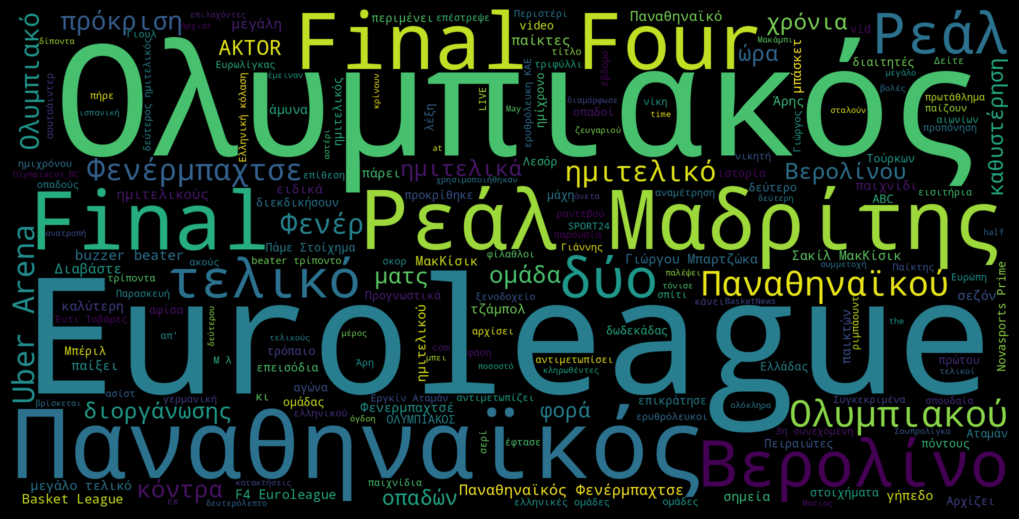

In [ ]:
wordcloud = WordCloud(
     stopwords = nlp.Defaults.stop_words,
     width = 2000,
     height = 1000,
     background_color = 'black'
  ).generate(' '.join(df[(df["source"]=="palo.gr") & (df["day"]==24)]["text"]))
fig = plt.figure(
     figsize = (10, 8),
     facecolor = 'k',
     edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

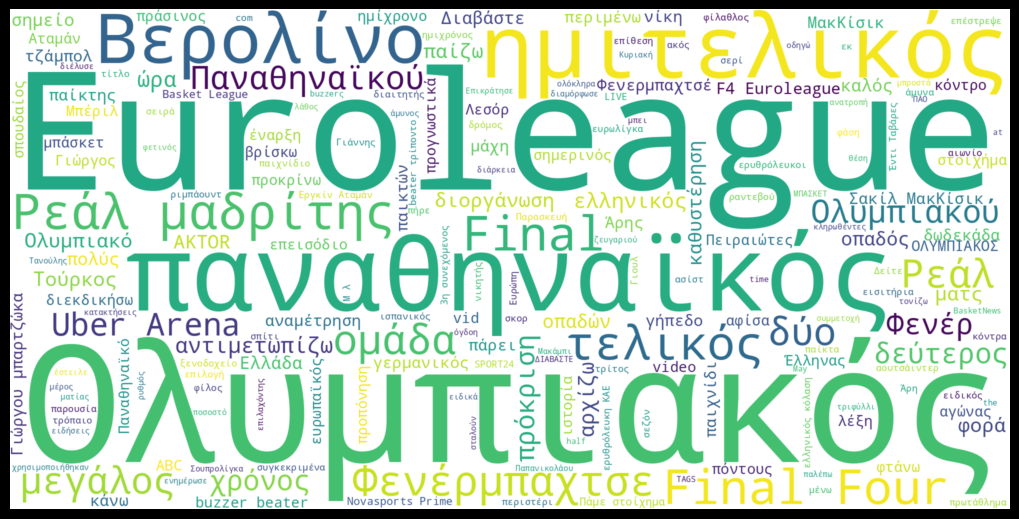

In [ ]:
wordcloud = WordCloud(
     stopwords = nlp.Defaults.stop_words,
     width = 2000,
     height = 1000,
     background_color = 'white'
  ).generate(' '.join(token.lemma_ for token in nlp(' '.join(df[(df["source"]=="palo.gr") & (df["day"]==24)]["text"]))))
fig = plt.figure(
     figsize = (10, 8),
     facecolor = 'k',
     edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
%matplotlib inline
import seaborn as sns

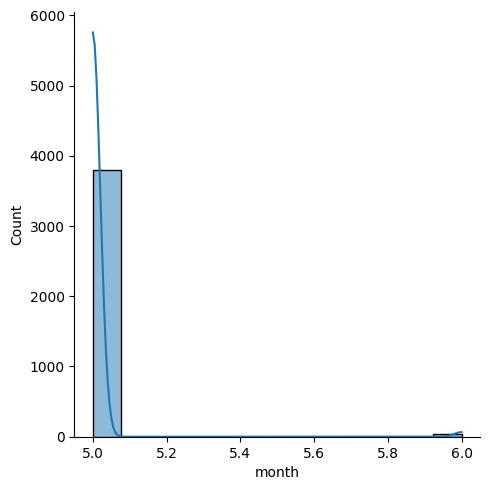

In [ ]:
sns.displot(df['month'],kde=True)

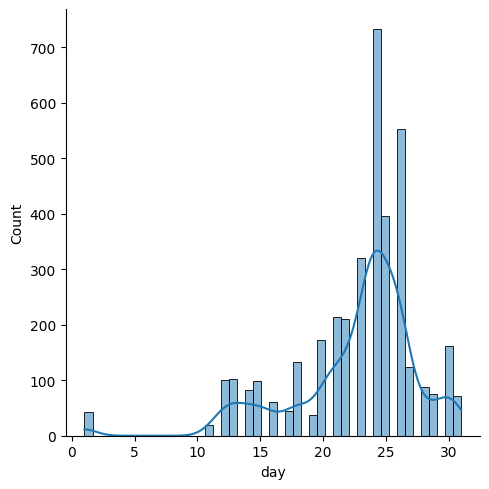

In [ ]:
sns.displot(df['day'],kde=True)

In [ ]:
df['source'].value_counts().head()

source
palo.gr          163
gazzetta.gr      142
sportal.gr       123
novasports.gr    122
sportlive.gr     112
Name: count, dtype: int64

In [ ]:
df["frequency"]=df['source'].value_counts()

In [ ]:
df

,index,type,source,title,text,categories,sentiment,date,time,link,datetime,year,month,day,hour,frequency
0,0,web,updatetimes.gr,Μιλουτίνοφ: «Όταν είσαι στο Final-4 δεν είναι ...,Μιλουτίνοφ: «Όταν είσαι στο Final-4 δεν είναι ...,EUROLEAGUE ΟΛΥΜΠΙΑΚΟΣ,Positive,2024-06-01,23:59:00,https://www.updatetimes.gr/miloutinof-otan-eis...,2024-06-01 23:59:00,2024,6,1,23,NaN
2,2,web,tempo24.news,Μιλουτίνοφ: «Συγχαρητήρια στον Παναθηναϊκό για...,Μιλουτίνοφ: «Συγχαρητήρια στον Παναθηναϊκό για...,EUROLEAGUE ΟΛΥΜΠΙΑΚΟΣ,Positive,2024-06-01,23:43:00,https://tempo24.news/eidisi/483626/miloytinof-...,2024-06-01 23:43:00,2024,6,1,23,NaN
3,3,web,makeleio.gr,ΠΟΙΟΣ ΕΛ ΚΑΑΜΠΙ!!! Το… σήκωσε ο Κούλης – Ποδοσ...,ΠΟΙΟΣ ΕΛ ΚΑΑΜΠΙ!!! Το… σήκωσε ο Κούλης – Ποδοσ...,EUROLEAGUE ΟΛΥΜΠΙΑΚΟΣ,Positive,2024-06-01,23:05:37,https://www.makeleio.gr/%ce%b5%cf%80%ce%b9%ce%...,2024-06-01 23:05:37,2024,6,1,23,NaN
4,4,web,radiovera.gr,Μιλουτίνοφ: «Συγχαρητήρια στον Παναθηναϊκό για...,Μιλουτίνοφ: «Συγχαρητήρια στον Παναθηναϊκό για...,EUROLEAGUE ΟΛΥΜΠΙΑΚΟΣ,Positive,2024-06-01,22:56:28,https://www.radiovera.gr/2024/06/01/miloutinof...,2024-06-01 22:56:28,2024,6,1,22,NaN
5,5,web,ieidiseis.gr,Αποθέωσε Παναθηναϊκό ο Μιλουτίνοφ - «Συγχαρητή...,Αποθέωσε Παναθηναϊκό ο Μιλουτίνοφ - «Συγχαρητή...,EUROLEAGUE ΟΛΥΜΠΙΑΚΟΣ,Positive,2024-06-01,22:12:29,https://www.ieidiseis.gr/athlitismos/249180/ap...,2024-06-01 22:12:29,2024,6,1,22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968,4995,web,bnsports.gr,Ο Γουόκαπ των αντιδράσεων: Ο Λεσόρ ήθελε κορυφ...,Ο Γουόκαπ των αντιδράσεων: Ο Λεσόρ ήθελε κορυφ...,EUROLEAGUE ΟΛΥΜΠΙΑΚΟΣ,Positive,2024-05-11,20:03:20,https://www.bnsports.gr/basketball/articles/66...,2024-05-11 20:03:20,2024,5,11,20,NaN
4969,4996,web,sportlive.gr,"Ρεάλ Μαδρίτης: Χωρίς Ντεκ με Ολυμπιακό, χάνει ...","Ρεάλ Μαδρίτης: Χωρίς Ντεκ με Ολυμπιακό, χάνει ...",EUROLEAGUE ΟΛΥΜΠΙΑΚΟΣ,Positive,2024-05-11,19:59:38,https://sportlive.gr/basket/euroleague/real-ma...,2024-05-11 19:59:38,2024,5,11,19,NaN
4970,4997,web,gazzetta.gr,Ολυμπιακός: Στον τελικό του Πανελλήνιου Πρωταθ...,Ολυμπιακός: Στον τελικό του Πανελλήνιου Πρωταθ...,EUROLEAGUE ΟΛΥΜΠΙΑΚΟΣ,Neutral,2024-05-11,19:28:25,https://www.gazzetta.gr/basketball/2332934/oly...,2024-05-11 19:28:25,2024,5,11,19,NaN
4971,4998,web,sportdog.gr,Παγίδα για τους φιλάθλους τα εισιτήρια του Fin...,Παγίδα για τους φιλάθλους τα εισιτήρια του Fin...,EUROLEAGUE ΟΛΥΜΠΙΑΚΟΣ,Neutral,2024-05-11,19:10:26,https://www.sportdog.gr/mpasket/euroleague/827...,2024-05-11 19:10:26,2024,5,11,19,NaN


<Axes: ylabel='source'>

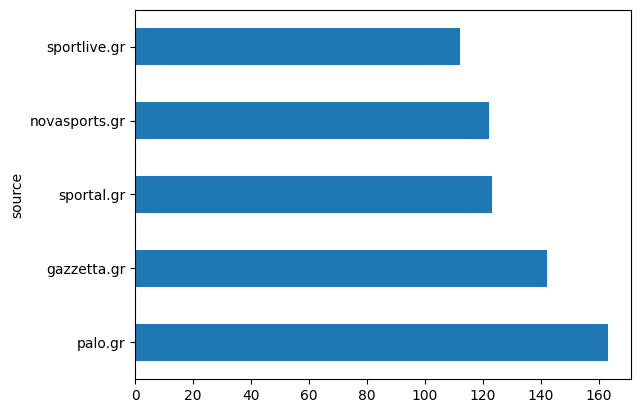

In [ ]:
df['source'].value_counts().head().plot(kind='barh')

In [ ]:
#ξεκιναω emolex

In [ ]:
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [ ]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [ ]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13157,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13158,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13159,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13160,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [ ]:
matrix = vec.fit_transform(df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df.shape

(3835, 13161)

In [ ]:
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df[emolex_df.Anger == 1].tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13094,διεξοδος,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13096,ζωυφια,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13100,θυματοποιω,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
13128,αποτυχημενος,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
positive_words = emolex_df[emolex_df.Positive == 1]['word']

negative_words = emolex_df[emolex_df.Negative == 1]['word']

angry_words = emolex_df[emolex_df.Anger == 1]['word']

anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

fear_words = emolex_df[emolex_df.Fear == 1]['word']

joy_words = emolex_df[emolex_df.Joy == 1]['word']

sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [ ]:
sadness_words

27           δευτερα παρουσια
28                   δευτερον
36                   εξαρτηση
62                 κορσικανος
69               λυρικη σκηνη
                 ...         
13123                ελλειπων
13129                 σπαταλω
13144    ανεξελεγκτη πυρκαγια
13147                 αλιμονο
13148           επιδεινωνεται
Name: word, Length: 1328, dtype: object

In [ ]:
wordcount_df.tail(1)

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
3834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df[sadness_words].tail(1)

,δευτερα παρουσια,δευτερον,εξαρτηση,κορσικανος,λυρικη σκηνη,μουσικη,ματαιωση,μη εγκυρο,παλαιοτερα,προκαθορισμενο,...,ανευ σημασιας,βλαστικος,βεντεττα,θυματοποιω,ωχρος,ελλειπων,σπαταλω,ανεξελεγκτη πυρκαγια,αλιμονο,επιδεινωνεται
3834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df[sadness_words].sum(axis=1)

0       10
1        9
2        1
3        6
4        7
        ..
3830     3
3831     1
3832     0
3833     1
3834     1
Length: 3835, dtype: int64

In [ ]:
short_df = df[['datetime','text' ]]

In [ ]:
short_df

,datetime,text
0,2024-06-01 23:59:00,Μιλουτίνοφ: «Όταν είσαι στο Final-4 δεν είναι ...
2,2024-06-01 23:43:00,Μιλουτίνοφ: «Συγχαρητήρια στον Παναθηναϊκό για...
3,2024-06-01 23:05:37,ΠΟΙΟΣ ΕΛ ΚΑΑΜΠΙ!!! Το… σήκωσε ο Κούλης – Ποδοσ...
4,2024-06-01 22:56:28,Μιλουτίνοφ: «Συγχαρητήρια στον Παναθηναϊκό για...
5,2024-06-01 22:12:29,Αποθέωσε Παναθηναϊκό ο Μιλουτίνοφ - «Συγχαρητή...
...,...,...
4968,2024-05-11 20:03:20,Ο Γουόκαπ των αντιδράσεων: Ο Λεσόρ ήθελε κορυφ...
4969,2024-05-11 19:59:38,"Ρεάλ Μαδρίτης: Χωρίς Ντεκ με Ολυμπιακό, χάνει ..."
4970,2024-05-11 19:28:25,Ολυμπιακός: Στον τελικό του Πανελλήνιου Πρωταθ...
4971,2024-05-11 19:10:26,Παγίδα για τους φιλάθλους τα εισιτήρια του Fin...


In [ ]:
short_df.tail()

,datetime,text
4968,2024-05-11 20:03:20,Ο Γουόκαπ των αντιδράσεων: Ο Λεσόρ ήθελε κορυφ...
4969,2024-05-11 19:59:38,"Ρεάλ Μαδρίτης: Χωρίς Ντεκ με Ολυμπιακό, χάνει ..."
4970,2024-05-11 19:28:25,Ολυμπιακός: Στον τελικό του Πανελλήνιου Πρωταθ...
4971,2024-05-11 19:10:26,Παγίδα για τους φιλάθλους τα εισιτήρια του Fin...
4972,2024-05-11 19:07:47,Eισιτήρια F4: «Μονόδρομος» για την εξέρευση θέ...


In [ ]:
short_df.head(3)

,datetime,text
0,2024-06-01 23:59:00,Μιλουτίνοφ: «Όταν είσαι στο Final-4 δεν είναι ...
2,2024-06-01 23:43:00,Μιλουτίνοφ: «Συγχαρητήρια στον Παναθηναϊκό για...
3,2024-06-01 23:05:37,ΠΟΙΟΣ ΕΛ ΚΑΑΜΠΙ!!! Το… σήκωσε ο Κούλης – Ποδοσ...


In [ ]:
short_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_df['fear'] = wordcount_df[fear_words].sum(axis=1)

<ipython-input-112-ba535ce3a623>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_df['anger'] = wordcount_df[angry_words].sum(axis=1)
<ipython-input-112-ba535ce3a623>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_df['positive'] = wordcount_df[positive_words].sum(axis=1)
<ipython-input-112-ba535ce3a623>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [ ]:
short_df

,datetime,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2024-06-01 23:59:00,Μιλουτίνοφ: «Όταν είσαι στο Final-4 δεν είναι ...,8.0,8.0,3.0,10.0,2.0,6.0,3.0,10.0,21.0,7.0
2,2024-06-01 23:43:00,Μιλουτίνοφ: «Συγχαρητήρια στον Παναθηναϊκό για...,1.0,2.0,0.0,1.0,0.0,4.0,0.0,1.0,3.0,0.0
3,2024-06-01 23:05:37,ΠΟΙΟΣ ΕΛ ΚΑΑΜΠΙ!!! Το… σήκωσε ο Κούλης – Ποδοσ...,7.0,9.0,3.0,7.0,1.0,8.0,5.0,6.0,16.0,5.0
4,2024-06-01 22:56:28,Μιλουτίνοφ: «Συγχαρητήρια στον Παναθηναϊκό για...,4.0,6.0,2.0,6.0,1.0,5.0,4.0,7.0,13.0,2.0
5,2024-06-01 22:12:29,Αποθέωσε Παναθηναϊκό ο Μιλουτίνοφ - «Συγχαρητή...,8.0,14.0,4.0,7.0,2.0,6.0,9.0,7.0,17.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4968,2024-05-11 20:03:20,Ο Γουόκαπ των αντιδράσεων: Ο Λεσόρ ήθελε κορυφ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4969,2024-05-11 19:59:38,"Ρεάλ Μαδρίτης: Χωρίς Ντεκ με Ολυμπιακό, χάνει ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4970,2024-05-11 19:28:25,Ολυμπιακός: Στον τελικό του Πανελλήνιου Πρωταθ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4971,2024-05-11 19:10:26,Παγίδα για τους φιλάθλους τα εισιτήρια του Fin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
short_df['text'].str.len().groupby(by=short_df.index.day).mean().plot()

AttributeError: 'Index' object has no attribute 'day'